<a href="https://colab.research.google.com/github/AlexBB999/Portfolio/blob/master/Capstone_Finalll_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U yellowbrick

     |████████████████████████████████| 266kB 3.5MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

In [2]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
#!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

##**THE SUM(MARY) OF ALL THINGS**

Alex Sloan

May 27, 20202

###**There are two main approaches to summarizing text documents; they are:**

###1.	**Extractive Methods**

###2. **Abstractive Methods**

###… **there are two different approaches for automatic summarization: extraction and abstraction. Extractive summarization methods work by identifying important sections of the text and generating them verbatim; […]**
###**abstractive summarization methods aim at producing important material in a new way. In other words, they interpret and examine the text using advanced natural language techniques in order to generate a new shorter text that conveys the most critical information from the original text**

Text Summarization Techniques: A Brief Survey, 2017.



**OBJECTIVE:**

####**Build a BERT based domain/business specific abstractive summarier**

####**The domain, in this model --  COVID-19**

###**In other words, build CovidBert**

**I WILL BE USING FOUR DIFFERENT EXTRACTIVE SUMMARIZER MODELS:**

**COUNT VECTORIZE**

**TF_IDF VECTORIZE**

**GENSIM**

**BERT**

**STAKEHOLDERS**

**The stakeholders are just about anybody.**

**1.7MB of data is created every second for every person on earth.**

**No one has time to read even an infentesimal fraction of it**.

**A domain specific summarizer would produce superior summaries of articles that are germane to your discipline or**

**allows you to create summarizers that are business specific -- either used internally or client facing**.






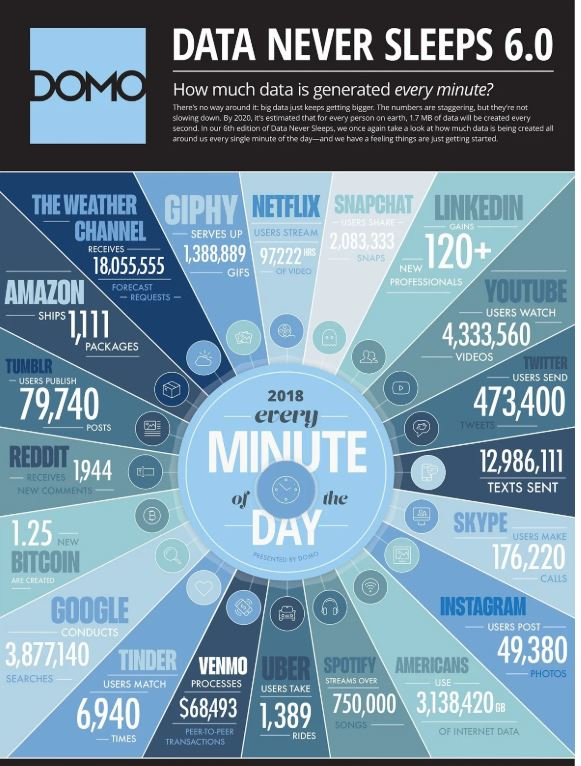

In [0]:
from IPython.display import Image

Image('https://raw.githubusercontent.com/AlexBB999/NLP/master/Capture2.jpg')

###**DOCUMENT SOURCE**

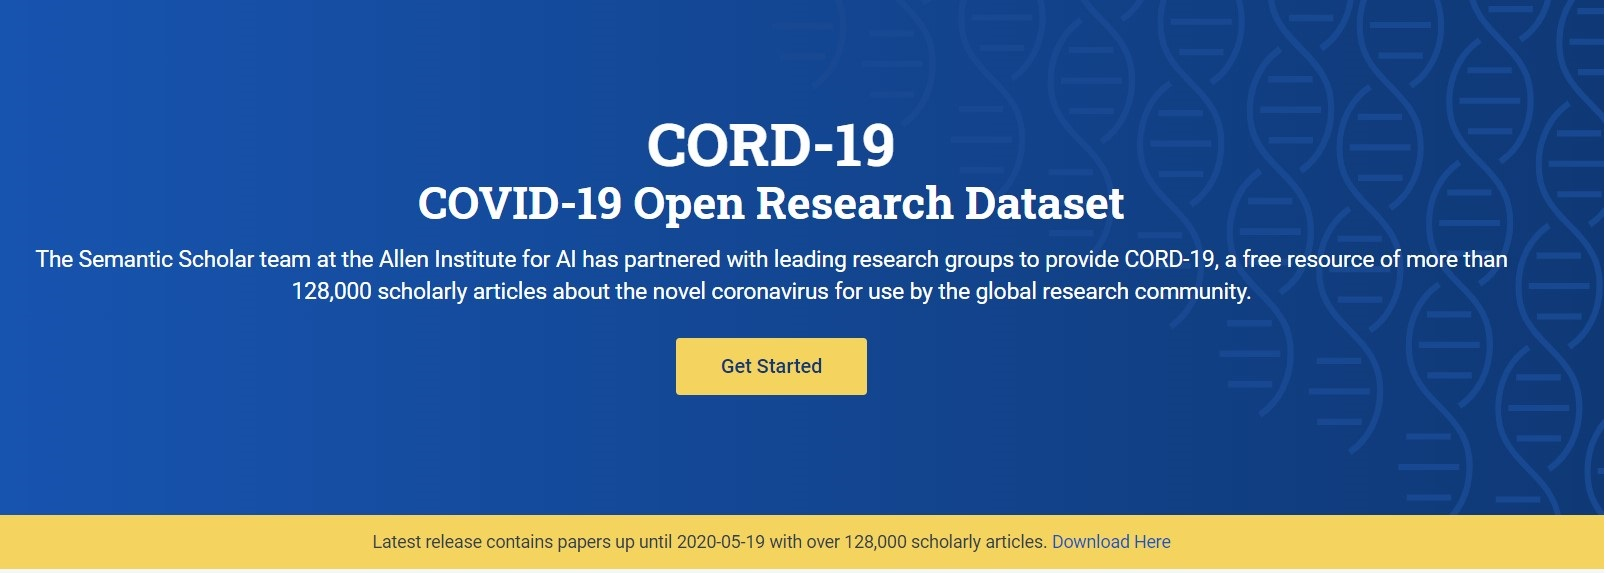

In [0]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/AlexBB999/NLP/master/Covid%2020XX-05-26%20200130.jpg')

In [0]:
%matplotlib inline
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import pandas as pd
import numpy as np
import re
import json
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
import en_core_web_sm
nlp = en_core_web_sm.load()
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


True

**READ DOCUMENT**

In [0]:
import json
with open('/content/Allen2.json') as json_file:
    data2 = json.load(json_file)

**K IS THE DOCUMENT AS A SINGLE STRING**

In [0]:
k=''
for text in data2['body_text']:
  k=k+(text["text"])

In [9]:
k[:300]

'Background 5′-triphosphorylated, 2′-5′-linked oligoadenylate polyribonucleotides (2-5As) of the structure pppA(pA) n where n ≥ 1, are the key components of the interferon (IFN)induced antiviral 2-5A system. IFNs are extracellular cytokines specific to (jawed) vertebrates and central to host innate i'

#**OVERVIEW**

**USE WORDCLOUD WITH DEFAULT STOPWORDS TO GET OVERVIEW**

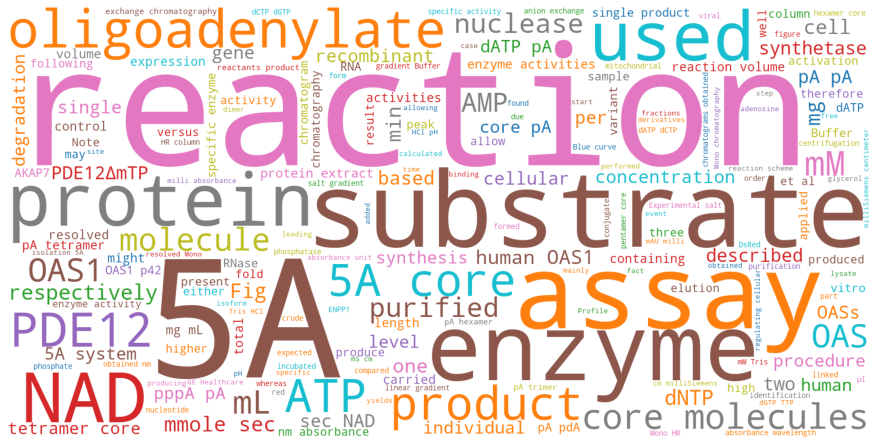

In [0]:
def word_cloud(text, colormap='tab10', background_color='white'):
    #cloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS,
                      #colormap=colormap, 
                      #background_color=background_color).generate(text)

    cloud = WordCloud(width=1600, height=800,stopwords=STOPWORDS.add("using"),
                      colormap=colormap, 
                      background_color=background_color).generate(text)
    
    
    plt.figure(figsize=(12,10))
    plt.imshow(cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

word_cloud(k)

###**SUMMARY STATISTICS**

In [0]:
def text_stats(doc):
    docx=nlp(doc)
    sents = docx.sents
    #okens = word_tokenize(doc)
    tokenx = [token.text for token in docx]

    #words = [token.lower() for token in tokensx]
            #if not token.lower() in stopwords.words('english')
            # if not token in string.punctuation]
    words=tokenx
    num_sents = len(list(sents))
    num_tokens = len(tokenx)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    
    spacy_doc = nlp(doc)
    remove = ['DATE']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    
    stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
             words_sent, char_word, lex_div]

    return stats

In [0]:
stats = []

#for index, doc in enumerate(docs):
doc_stats = text_stats(k)
doc_stats = [f'ArticleX'] + doc_stats
stats.append(doc_stats)

doc_df = pd.DataFrame(stats)
doc_df.columns = ['Document', 'Sentences', 'Tokens', 'Words', 'Vocabulary', 'Entities', 
                  'Avg. Sent Length', 'Avg. Word Length', 'Lexical Diversity']

In [15]:
doc_df.head()

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
0,ArticleX,471,9350,9350,1647,290,19.85138,4.152299,0.17615


###**TOP 20 WORDS BY FREQUENCY**

In [0]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    preprocessed = []
    
    for doc in docs:
        tokenized = word_tokenize(doc)

        cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) 
                   for token in tokenized 
                   if not token.lower() in stopwords.words('english') 
                   if token.isalpha()]

        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)
        
    return preprocessed

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa86bafd6a0>,
                    color=None,
                    features=['aa', 'abil', 'abl', 'absorb', 'accept', 'access',
                              'accommod', 'accord', 'account', 'accumul',
                              'achiev', 'acid', 'acroprep', 'activ', 'actual',
                              'ad', 'addit', 'address', 'adenin', 'adenosin',
                              'adenyl', 'agar', 'aim', 'al', 'albeit',
                              'aliquot', 'alkalin', 'allow', 'alon', 'along', ...],
                    n=None, orient='h')

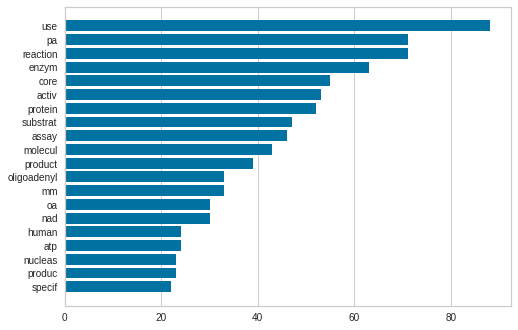

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
#from yellowbrick.datasets import load_hobbies

# Load the text data
#corpus = load_hobbies()

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(preprocessed)
features   = vectorizer.get_feature_names()

#visualizer = FreqDistVisualizer(features=features, orient='h')
visualizer = FreqDistVisualizer(features=features,n=20)
plt.xlabel=( 'WORDS')
visualizer.fit(docs)
#visualizer.show()

**K2 BREAKS K INTO SENTENCES**

In [0]:
docx=nlp(k)
sents = docx.sents

k2=list(sents)

In [0]:
k2=np.array(k2)

In [0]:
df_k2=pd.DataFrame(data=k2)

In [0]:
df_k2.columns=['text']

In [26]:
df_k2.shape

(471, 1)

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

In [0]:
docs=k2

In [0]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**===========================================================================**

###**VISUAL TO HELP EXPLAIN CONVERTING WORDS TO NUMBERS FOR ANYONE NOT FAMILIAR WITH NLP**

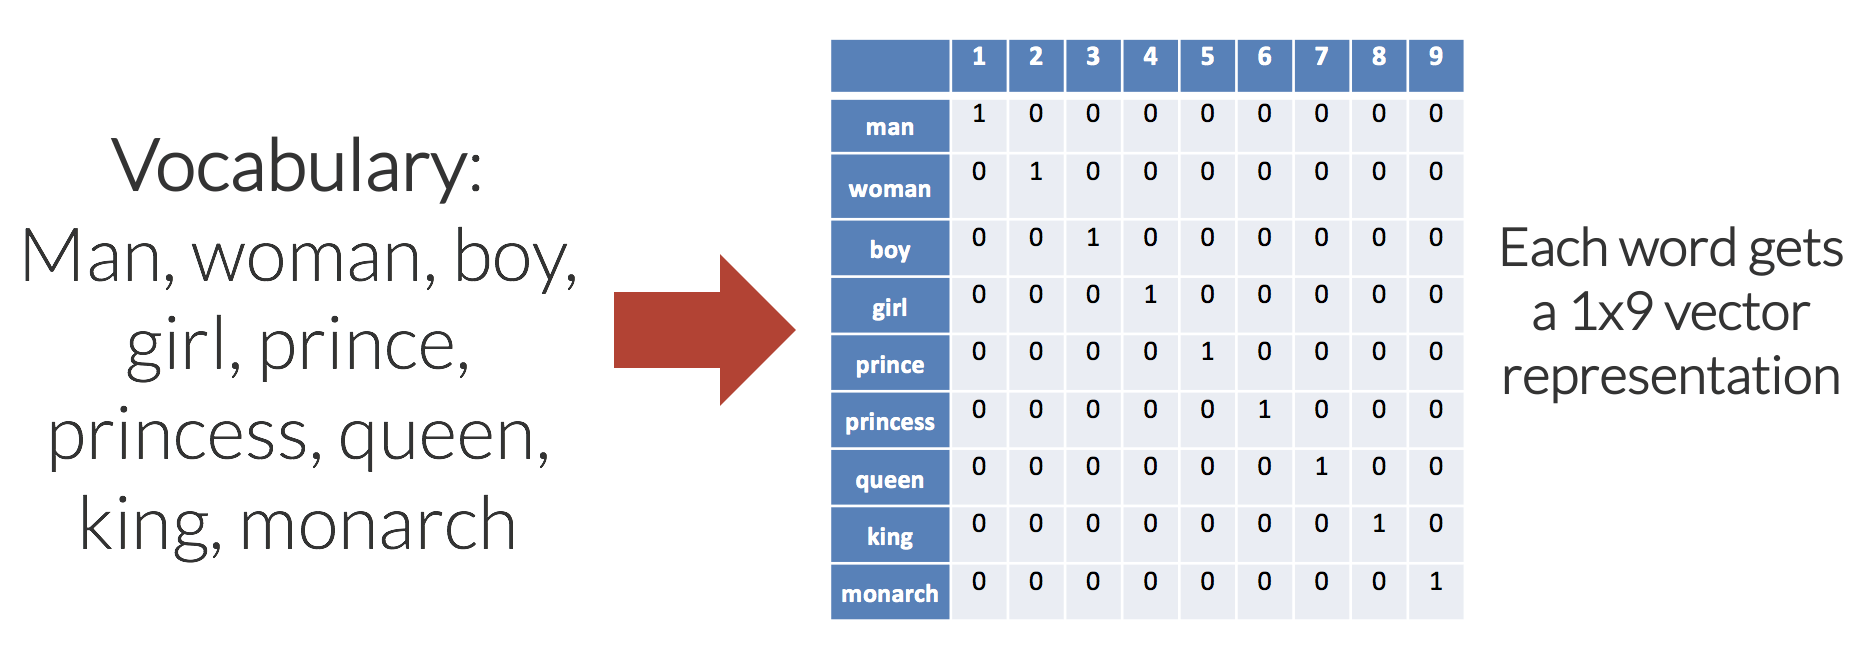

In [0]:
Image("https://raw.githubusercontent.com/AlexBB999/NLP/master/one-hot-word-embedding-vectors.png")

####**END OF NORMALIZATION**

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

###**WHY EXTRACTIVE SUMMARIZATION DOES NOT FIRST NORMALIZE**

**SAMPLE PARAGRAPH**

In [0]:
P='On July 16, 1969, the Apollo 11 spacecraft launched from the Kennedy Space Center in Florida. Its mission was to go where no human being had gone before—the moon! The crew consisted of Neil Armstrong, Michael Collins, and Buzz Aldrin. The spacecraft landed on the moon in the Sea of Tranquility, a basaltic flood plain, on July 20, 1969. The moonwalk took place the following day. On July 21, 1969, at precisely 10:56 EDT, Commander Neil Armstrong emerged from the Lunar Module and took his famous first step onto the moon’s surface. He declared, “That’s one small step for man, one giant leap for mankind.” It was a monumental moment in human history!'

**IMPORT GENSIM SUMMARIZER**

In [0]:
from pprint import pprint as print
from gensim.summarization import summarize

**SUMMARY BEFORE NORMALIZATION**


In [0]:
print(summarize(P,split=True))

['On July 21, 1969, at precisely 10:56 EDT, Commander Neil Armstrong emerged '
 'from the Lunar Module and took his famous first step onto the moon’s '
 'surface.']


**NORMALIZER**

In [0]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    preprocessed = []
    
    #for doc in docs:
    tokenized = word_tokenize(docs)

    cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) 
                for token in tokenized 
                if not token.lower() in stopwords.words('english') ]
                #if token.isalpha()]

    untokenized = " ".join(cleaned)
    preprocessed.append(untokenized)
        
    return preprocessed

In [0]:
P2=preprocess(P)

**SUMMARY AFTER PREPROCESSING/NORMALIZATION**

**THE LONGER THE TEXT, THE WORSE IT GETS**

In [0]:
print(summarize(P2[0]))

('juli 21 , 1969 , precis 10:56 edt , command neil armstrong emerg lunar modul '
 'took famous first step onto moon ’ surfac .')


**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

###**THE FLOWCHART FOR TEXTRANK -- THE ALGORITHM USED IN EXTRACTIVE TEXT SUMMARIZATION**

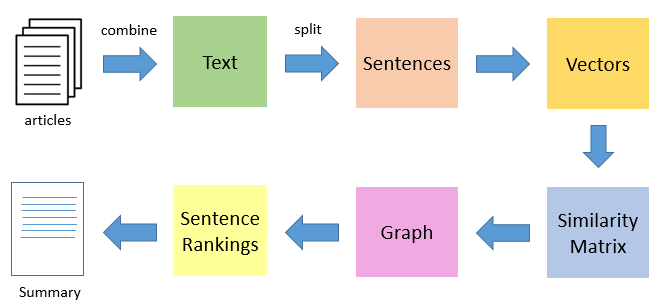

In [0]:
from nltk.cluster.util import cosine_distance
import networkx as nx

In [0]:
kxx=[str(x) for x in df_k2.text]

###**COUNT VECTORIZE**

In [0]:
count_vectorizer = CountVectorizer()
countx = count_vectorizer.fit_transform(kxx)

In [40]:
countx

<471x1406 sparse matrix of type '<class 'numpy.int64'>'
	with 6221 stored elements in Compressed Sparse Row format>

In [0]:
doc_term_matrix = countx.todense()
df = pd.DataFrame(doc_term_matrix)

In [42]:
df.shape

(471, 1406)

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**USE COSINE SIMILARITY**

In [0]:
cs=cosine_similarity(df.values, df.values)

In [45]:
cs.shape

(471, 471)

In [0]:
 sentence_similarity_graph=nx.from_numpy_matrix(cs)
 scores = nx.pagerank(sentence_similarity_graph)

In [0]:
sentence_similarity_graph

In [0]:
ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)  

  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)   
  print(' ') 
  print(' ')
  print('ranked sentences',ranked_sentence)
  print("Indexes of top ranked_sentence order are ", ranked_sentence)    
  #ranked_sentence

In [88]:
ranked_sentence[0]

(0.004986154345200575,
 In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.)

**COUNTVECTORIZE SUMMARY**

In [89]:
for i in range(5):
  print(ranked_sentence[i][1])
  

In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.
Of the three substrates utilized here: A(pA) 3 tetramer core, A(pA) 4 pentamer core and A(pA) 5 hexamer core, a total of 17.2, 15.5 and 11.3 mg were obtained corresponding to 10.1, 9.1 and 6.6 mg of oligoadenylate per mg human His-OAS1 used in the reaction, respectively.
for each of the fractionations, therefore the method was repeated several times in order to obtain separation of the entire reaction volume of 200 mL. For concentration of the oligoadenylates, the fractions of successive runs representing identical peaks were pooled and diluted 10 fold in Buffer C, in most cases resulting in total volumes of 1-2 l. This was applied over night to the Mono Q HR 16/10 column using the inlet A of the ÄKTAexplorer chromat

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

**NETWORKX SENTENCE SIMILARITY GRAPH FOR FIRST 20 SENTENCES (COUNT_VECTORIZE)**



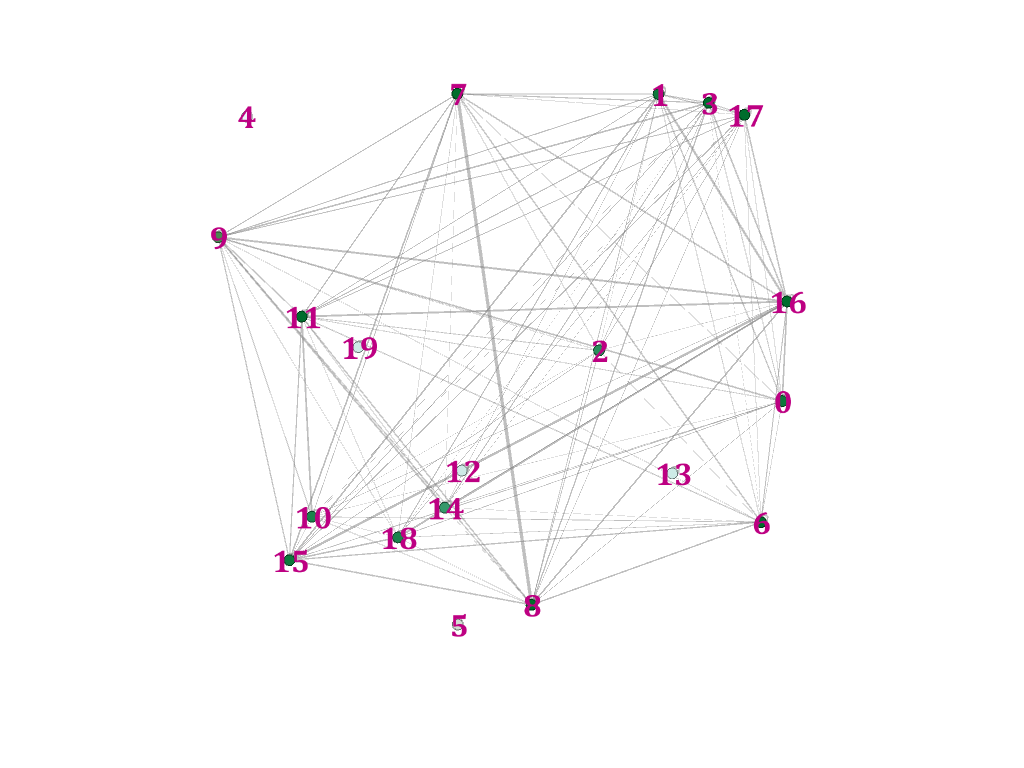

In [53]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/AlexBB999/NLP/master/last.png')

##**TF-IDF**

In [0]:
tf_vectorizer=TfidfVectorizer()
tf =tf_vectorizer.fit_transform (kxx)

In [55]:
tf

<471x1406 sparse matrix of type '<class 'numpy.float64'>'
	with 6221 stored elements in Compressed Sparse Row format>

In [0]:
doc_tf_matrix = tf.todense()
df2 = pd.DataFrame(doc_tf_matrix)

In [79]:
df2.shape

(471, 1406)

In [80]:
doc_tf_matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
cost=cosine_similarity(df2.values,df2.values)

In [0]:
 sentence_similarity_graph=nx.from_numpy_matrix(cost)
 scores = nx.pagerank(sentence_similarity_graph)

In [0]:
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)

**TF-IDF SUMMARY**

In [91]:
for i in range(5):
  print(ranked_sentence[i][1])

In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.
Of the three substrates utilized here: A(pA) 3 tetramer core, A(pA) 4 pentamer core and A(pA) 5 hexamer core, a total of 17.2, 15.5 and 11.3 mg were obtained corresponding to 10.1, 9.1 and 6.6 mg of oligoadenylate per mg human His-OAS1 used in the reaction, respectively.
for each of the fractionations, therefore the method was repeated several times in order to obtain separation of the entire reaction volume of 200 mL. For concentration of the oligoadenylates, the fractions of successive runs representing identical peaks were pooled and diluted 10 fold in Buffer C, in most cases resulting in total volumes of 1-2 l. This was applied over night to the Mono Q HR 16/10 column using the inlet A of the ÄKTAexplorer chromat

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

**GENSIM**

In [0]:
from pprint import pprint as print
from gensim.summarization import summarize

In [0]:
s=summarize(k,split=True,ratio=.025)

###**GENSIM SUMMARY**

In [67]:
s

['The following general reaction scheme apply to the varied enzyme capabilities of the OASs: RpA + (d)NTP → PPi + RpA-(d)NMP in which the incorporation of AMP prompts for oligoadenylate synthesis by means of multiple 2′ elongation events (the other NMPs and dNMPs make up single incorporation events only).Due to low sequence specificity, RNase L degrades cellular RNA and prolonged activation results in an antiproliferative response leading to apoptosis [9] [10] [11] 16] .',
 'This assay is well-suited to assess the broader cellular role expected of the OASs, based on the very diverse substrate specificity in vitro.Human OAS1 p42 containing an N-terminal His-tag (His-OAS1) cloned in the pET9d bacterial expression vector was a kind gift from Kineta (formerly Illumigen Biosciences).The plasmid was transformed into the E.coli BL21 (DE3) strain and plated on selective LB agar (50 μg/mL ampicillin), followed by inoculation of single colonies to selective LB medium for incubation at 37°C for 1

**xxxxxXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

##**BERT**

In [68]:
! pip install bert-extractive-summarizer

     |████████████████████████████████| 675kB 4.7MB/s 
     |████████████████████████████████| 1.1MB 19.1MB/s 
     |████████████████████████████████| 890kB 27.2MB/s 
     |████████████████████████████████| 3.8MB 34.4MB/s 
  Created wheel for bert-extractive-summarizer: filename=bert_extractive_summarizer-0.4.2-cp36-none-any.whl size=13711 sha256=1a3b3d5e28e491513ad3f202b358d2321b2b0150fa83cc5efc3dfcd2cc817908
  Stored in directory: /root/.cache/pip/wheels/13/bc/30/654eb9e657177a56cba927c5a20b6cd01fb229b1ed2bf9b371
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=6099008d4428c9ed97769cf4dcc338690e029db9b827ad09f5623111daa672a2
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built bert-extractive-summarizer sacremoses


In [0]:
from summarizer import Summarizer
model = Summarizer()
result = model(k, min_length=40,ratio=.020)
full = "".join(result)

##**BERT SUMMARY**

In [0]:
full.split('. ')

['Background 5′-triphosphorylated, 2′-5′-linked oligoadenylate polyribonucleotides (2-5As) of the structure pppA(pA) n where n ≥ 1, are the key components of the interferon (IFN)induced antiviral 2-5A system',
 'The following general reaction scheme apply to the varied enzyme capabilities of the OASs: RpA + (d)NTP → PPi + RpA-(d)NMP in which the incorporation of AMP prompts for oligoadenylate synthesis by means of multiple 2′ elongation events (the other NMPs and dNMPs make up single incorporation events only).Due to low sequence specificity, RNase L degrades cellular RNA and prolonged activation results in an antiproliferative response leading to apoptosis [9] [10] [11] 16] ',
 '1b and c show how individual 2-5As and 2-5A core molecules up to and above the decamer length were successfully resolved',
 'Brown curves: Experimental salt gradients',
 "We calculated the specific enzyme activity of the human OAS1 p42 for production of A(pA) 3 pdA to be 1.1 mmole/(sec*g).We also made addition

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

##**METRICS**

The usual metric used to compare summaries is **ROGUE SCORE**

I could not get Rogue installed because of changes in dependencies

Thus, I was forced to fall back on the **GOLD STANDARD** -- **HUMAN EVALUATION**




I say BERT produced the  best summary

##**CONCLUSIONS/COMMENTS**

**A production model BERT based abstractive summarizer has not yet been realized but people are working on it.**

**It would produce summaries magnitudes better than any currently in production**.

**My proposal was build this summarizer but I soon discovered that it was way beyond my current capabilities**.

**Thus, I was forced to fall back on an extractive summarizer project**.